# 定番の手書き文字識別

In [ ]:
import numpy as np
np.random.seed(20160715) # シード値を固定

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt

## MNIST データセットを取り込む

In [25]:
# MNIST データセットを取り込む
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 変換前：28 x 28 の2次元配列 x 60,000
# 変換後：784要素の1次元配列 x 60,000（256階調を 0 〜 1 に正規化）
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test  = X_test.reshape(10000, 784).astype('float32') / 255

# 変換前：0 〜 9 の数字 x 60,000
# 変換後：10要素の1次元配列（one-hot 表現） x 60,000
#         - 0 : [1,0,0,0,0,0,0,0,0,0]
#         - 1 : [0,1,0,0,0,0,0,0,0,0]
#         ...
Y_train = np_utils.to_categorical(y_train, 10)
Y_test  = np_utils.to_categorical(y_test, 10)

## 学習モデルを定義する

In [17]:
# シーケンシャルモデル
model = Sequential()

# 隠れ層 1
# - ノード数：512
# - 入力：784次元
# - 活性化関数：relu
# - ドロップアウト比率：0.2
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 隠れ層 2
# - ノード数：512
# - 活性化関数：relu
# - ドロップアウト比率：0.2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 出力層
# - ノード数：10
# - 活性化関数：softmax
model.add(Dense(10))
model.add(Activation('softmax'))

# モデルの要約を出力
model.summary()

# 学習過程の設定
# - 目的関数：categorical_crossentropy
# - 最適化アルゴリズム：rmsprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
__________

## 学習

In [30]:
# 学習
# - バッチサイズ：128
# - 学習の繰り返し回数：20
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    nb_epoch=20,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  640/60000 [..............................] - ETA: 15s - loss: 0.0340 - acc: 0.9891

C:\tools\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 17s 278us/step - loss: 0.0329 - acc: 0.9906 - val_loss: 0.0747 - val_acc: 0.9832
Epoch 2/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0978 - val_acc: 0.9817
Epoch 3/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0298 - acc: 0.9921 - val_loss: 0.0942 - val_acc: 0.9809
Epoch 4/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0248 - acc: 0.9927 - val_loss: 0.0991 - val_acc: 0.9833
Epoch 5/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0238 - acc: 0.9936 - val_loss: 0.0887 - val_acc: 0.9837
Epoch 6/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0234 - acc: 0.9940 - val_loss: 0.1052 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0200 - acc: 0.9944 - val_loss: 0.1211 - val_acc: 0.9813
Epoch 8/20
60000/60000 [==============

## 学習結果を評価

In [48]:
# 評価
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.11625512192015981
Test accuracy : 0.984


## 学習過程をグラフで出力

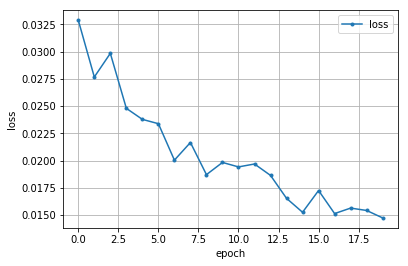

In [36]:
# 学習過程をグラフで出力
loss     = history.history['loss']
#val_loss = history.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
#plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 詳しくデータの内容を見てみる

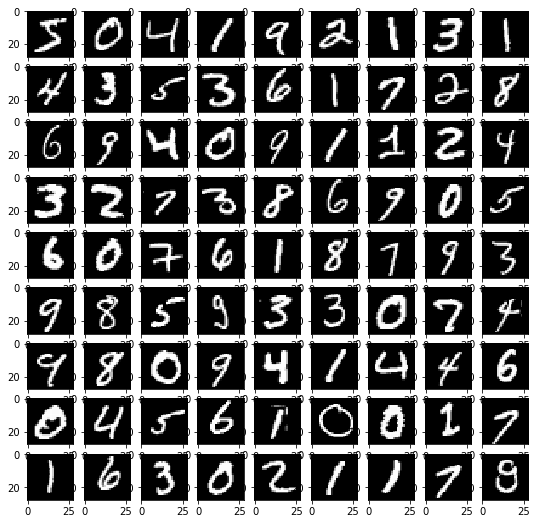

In [14]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
## --------- ここに繰り返し処理を追加
## ９×９の枠にデータを描画します。８１回繰り返し描画処理を実行して下さい。for ・・・
    ax = fig.add_subplot(9, 9, XXX ) ## add_subplot(l,c,n)は,l行目c列のn番目のグラフを追加することを表します。 適当な数値を入れて下さい
    ax.imshow(, cmap='gray') ## XXX にx_trainのデータを指定して下さい
    

## 学習、テストに使っているデータの中身


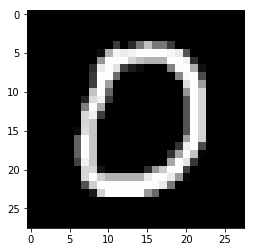

In [53]:
## テストデータ「x_test」の10番目のデータを表示して下さい。
plt.imshow( XXX , cmap='gray')  ## XXX　に入れてみて下さい。

In [57]:
## テストに使ったデータ
## x_test と、y_testの10番目のデータの中身を表示して下さい。
print(XXXX) # x_testの内容を出力してください。
print('--------------------x_test[10]の答え')
print(XXXX) # y_testの内容を出力してください。

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  61   3  42 118 193 118 118
   61   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 179 245 236 242 254 254 254 254
  245 235  84   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 151 254 254 254 213 192 178 178 180
  254 254 241  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 235 254 226  64  28  12   0   0   2
  128 252 255 173  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  56 254 253 107   0   0   0   

# その他 pandasでkaggleデータを使ってみる

https://www.kaggle.com/


In [73]:
## Pandasサンプル
## train.csv を読み込んでください。
## ファイルの読み込みは、read_csv('train.csv') です。

## データの中身を表示してください

## データをグラフ化して下さい


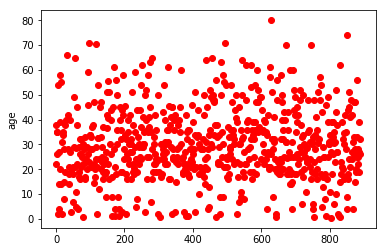

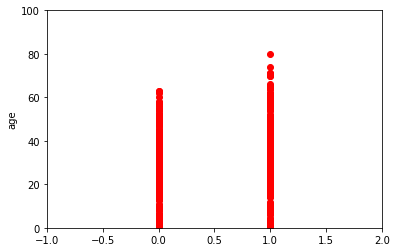

In [85]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

plt.plot(df['Age'],'ro')
plt.ylabel('age')
plt.show()

df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
plt.plot(df['Sex'],df['Age'],'ro')
plt.axis([-1, 2, 0, 100])
plt.ylabel('age')
plt.show()